<h1 align=center><font size = 5> New York Taxi Analysis</font></h1>

## 1. Introduction

A taxi company tackle a problem is how to assign the cabs to passengers efficiently. One of main issue is determining the duration of the current trip so it can predict when the cab will be free for the next trip. You are challenged to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission. To build the best model, you would do analysis to find the best features that have relative with trip duration of taxi. In this project, you will practice data analysis and data visualization skill using Python such as: describe the data, handle missing value, data cleansing, feature engineer, feature selection to get insights about the data and determine how different variables are dependent on the target variable **Trip Duration**.

## 2. Data description


### File descriptions
train.csv - contains 1458644 trip records

weather_data_nyc.csv - the weather information in each day of trip

fastest_routes_train_part_1.csv

fastest_routes_train_part_2.csv


### Data fields
#### train.csv:
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor - because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

- trip_duration - duration of the trip in seconds. Our target feature in the training data is measured in seconds

#### weather_nyc.csv

Weather data collected from the National Weather Service. It contains the first six months of 2016, for a weather station in central park. It contains for each day the minimum temperature, maximum temperature, average temperature, precipitation, new snow fall, and current snow depth. The temperature is measured in Fahrenheit and the depth is measured in inches. T means that there is a trace of precipitation.

- date : date of collecting data
- maximum temperature
- minimum temperature
- average temperature
- precipitation
- snow fall
- snow depth

#### fastest routes

This is suggested information about the fastest route from starting street to ending street for a trip that will help you estimate the duration.

- id - a unique identifier for each trip
- starting_street - a street when start the trip
- end_street - a street at end of the trip
- total_distance
- total_travel_time
- number_of_steps
- street_for_each_step
- distance_per_step
- travel_time_per_step
- step_maneuvers
- step_direction
- step_location_list



<h1 align=center><font size = 5>Project Requirements</font></h1>

Complete following tasks in this projects:



### Import Python Package

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

### <span style="color:blue">1.Load data</span>
- Load trip data that describes above using DataFrame in Pandas

In [15]:
df1 = pd.read_csv("trip.csv")
df2 = pd.read_csv("weather_data_nyc.csv")
df3 = pd.read_csv("fastest_routes_train_part_1.csv")
df4 = pd.read_csv("fastest_routes_train_part_2.csv")
df4.head()

id   starting_street        end_street  total_distance  \
0  id0363241        3rd Avenue  East 79th Street          2603.4   
1  id1188175        5th Avenue  West 30th Street          1526.9   
2  id3584231        2nd Avenue   Thompson Street          2564.9   
3  id3283815  Lexington Avenue  East 84th Street          3886.2   
4  id0420326  West 16th Street  West 31st Street          1706.4   

   total_travel_time  number_of_steps  \
0              211.8                4   
1              195.0                5   
2              341.0                8   
3              331.9                7   
4              235.7                4   

                                street_for_each_step  \
0  3rd Avenue|3rd Avenue|East 79th Street|East 79...   
1  5th Avenue|West 29th Street|8th Avenue|West 30...   
2  2nd Avenue|East 13th Street|5th Avenue|Washing...   
3  Lexington Avenue|East 49th Street|Park Avenue|...   
4  West 16th Street|6th Avenue|West 31st Street|W...   

                            distance_per_step  \
0                         606.1|1948.8|48.5|0   
1                        359|858.4|79|230.4|0   
2  688.4|836.5|496.1|164.2|154.9|154.2|70.7|0   
3          37|147.7|78.6|745.6|2755.9|121.4|0   
4                        288.4|1170.4|247.6|0   

                 travel_time_per_step  \
0                    49.5|159.1|3.2|0   
1                52.4|106|10.9|25.7|0   
2  84.5|109|69.9|25.8|24.7|19.3|7.8|0   
3      6.6|13.8|9.2|62.1|222.8|17.4|0   
4                   41.7|166.3|27.7|0   

                                      step_maneuvers  \
0                            depart|fork|turn|arrive   
1                       depart|turn|turn|turn|arrive   
2  depart|turn|turn|end of road|continue|continue...   
3             depart|turn|turn|turn|turn|turn|arrive   
4                            depart|turn|turn|arrive   

                                  step_direction  \
0                 right|slight right|left|arrive   
1                  none|right|right|right|arrive   
2  right|right|left|right|left|left|right|arrive   
3      right|right|right|right|left|right|arrive   
4                          none|left|left|arrive   

                                  step_location_list  
0  -73.971925,40.75418|-73.968457,40.758954|-73.9...  
1  -73.984788,40.748127|-73.986846,40.745301|-73....  
2  -73.981498,40.737077|-73.985444,40.731658|-73....  
3  -73.972608,40.756161|-73.97282,40.75587|-73.97...  
4  -73.998865,40.739945|-73.995874,40.738686|-73....

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
df1.head()

(1458644, 11)
(366, 7)
(700000, 12)
(758643, 12)


id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [20]:
df2.head()

date  maximum temperature  minimum temperature  average temperature  \
0  1-1-2016                   42                   34                 38.0   
1  2-1-2016                   40                   32                 36.0   
2  3-1-2016                   45                   35                 40.0   
3  4-1-2016                   36                   14                 25.0   
4  5-1-2016                   29                   11                 20.0   

  precipitation snow fall snow depth  
0          0.00       0.0          0  
1          0.00       0.0          0  
2          0.00       0.0          0  
3          0.00       0.0          0  
4          0.00       0.0          0

In [27]:
df34 = pd.concat([df3, df4], axis=0, sort=False)
df34.head()

id   starting_street              end_street  total_distance  \
0  id2875421   Columbus Circle        East 65th Street          2009.1   
1  id2377394        2nd Avenue  Washington Square West          2513.2   
2  id3504673  Greenwich Street                Broadway          1779.4   
3  id2181028          Broadway        West 81st Street          1614.9   
4  id0801584  Lexington Avenue        West 31st Street          1393.5   

   total_travel_time  number_of_steps  \
0              164.9                5   
1              332.0                6   
2              235.8                4   
3              140.1                5   
4              189.4                5   

                                street_for_each_step  \
0  Columbus Circle|Central Park West|65th Street ...   
1  2nd Avenue|East 13th Street|5th Avenue|Washing...   
2      Greenwich Street|Park Place|Broadway|Broadway   
3  Broadway|West 86th Street|Columbus Avenue|West...   
4  Lexington Avenue|East 27th Street|Madison Aven...   

                 distance_per_step        travel_time_per_step  \
0            0|576.4|885.6|547.1|0          0|61.1|60.1|43.7|0   
1  877.3|836.5|496.1|164.2|139.1|0  111.7|109|69.9|25.8|15.6|0   
2              644.2|379.9|755.3|0           80.5|50.8|104.5|0   
3          617|427.4|412.2|158.3|0           56|36|37.8|10.3|0   
4         18.9|311.9|313.3|749.4|0        6.3|42.9|48.4|91.8|0   

                                 step_maneuvers  \
0            depart|rotary|turn|new name|arrive   
1  depart|turn|turn|end of road|continue|arrive   
2                depart|turn|end of road|arrive   
3                  depart|turn|turn|turn|arrive   
4                  depart|turn|turn|turn|arrive   

                        step_direction  \
0  left|straight|right|straight|arrive   
1    none|right|left|right|left|arrive   
2               left|left|right|arrive   
3         right|left|right|left|arrive   
4        right|right|right|left|arrive   

                                  step_location_list  
0  -73.982316,40.767869|-73.981997,40.767688|-73....  
1  -73.980429,40.73857|-73.985444,40.731658|-73.9...  
2  -74.010145,40.719982|-74.011527,40.714294|-74....  
3  -73.972998,40.793187|-73.976607,40.788361|-73....  
4  -73.982805,40.742173|-73.982914,40.742024|-73....

### <span style="color:blue">2.Reformat data type</span>
- Some datatime fields have wrong data types, write your code to change to correct format.

In [22]:
df1['pickup_datetime'] = pd.to_datetime(df1['pickup_datetime'])
df1['dropoff_datetime'] = pd.to_datetime(df1['dropoff_datetime'])
df2['date'] = df2['date'].astype('datetime64[ns]') 
print(df1.dtypes)
print(df2.dtypes)
print(df34.dtypes)

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object
date                   datetime64[ns]
maximum temperature             int64
minimum temperature             int64
average temperature           float64
precipitation                  object
snow fall                      object
snow depth                     object
dtype: object
id                       object
starting_street          object
end_street               object
total_distance          float64
total_travel_time       float64
number_of_steps           int64
street_for_each_step     object
distance_per_step        object
travel_time_per_step     object
step_maneuv

### <span style="color:blue">3.Descriptive Statistics </span>
- Using Descriptive Statistics to find some insights in 3 tables. Write your finding in the report

In [42]:
df1.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  trip_duration_log  
count       1.458644e+06      1.458644e+06   1.458644e+06       1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02       2.807506e+00  
std         7.064327e-02      3.589056e-02   5.237432e+03       3.472672e-01  
min        -1.219333e+02      3.218114e+01   1.000000e+00       0.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02       2.598791e+00  
50%        -7.397975e+01      4.075452e+01   6.620000e+02       2.820858e+00  
75%        -7.396301e+01      4.076981e+01   1.075000e+03       3.031408e+00  
max        -6.133553e+01      4.392103e+01   3.526282e+06       6.547317e+00

In [43]:
df2.describe()

maximum temperature  minimum temperature  average temperature
count           366.000000           366.000000           366.000000
mean             64.625683            49.806011            57.215847
std              18.041787            16.570747            17.124760
min              15.000000            -1.000000             7.000000
25%              50.000000            37.250000            44.000000
50%              64.500000            48.000000            55.750000
75%              81.000000            65.000000            73.500000
max              96.000000            81.000000            88.500000

In [44]:
df34.describe()

total_distance  total_travel_time  number_of_steps
count    1.458643e+06       1.458643e+06     1.458643e+06
mean     4.626383e+03       3.893719e+02     7.547126e+00
std      5.303878e+03       3.144679e+02     4.432504e+00
min      0.000000e+00       0.000000e+00     2.000000e+00
25%      1.666100e+03       1.815000e+02     5.000000e+00
50%      2.755100e+03       2.895000e+02     6.000000e+00
75%      5.113800e+03       4.907000e+02     9.000000e+00
max      9.420420e+04       5.135400e+03     4.600000e+01

In [45]:
print( df34['total_distance'].nlargest(10))

728490    94204.2
386407    93426.9
405837    88204.1
603493    87975.7
742818    87934.1
750103    85646.7
757465    85064.3
456501    84077.5
737988    83158.0
735846    82611.2
Name: total_distance, dtype: float64


#### 3.1. Univariate Analysis
- Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data. 
- Your objective is finding features that correlate with trip duration and using these to predict duration of taxi trip. In first step, you must get more understand about each column (feature) in train.csv that will help you find best features.



In [46]:
df1.corr()

vendor_id  passenger_count  pickup_longitude  \
vendor_id           1.000000         0.287415          0.007820   
passenger_count     0.287415         1.000000          0.002169   
pickup_longitude    0.007820         0.002169          1.000000   
pickup_latitude     0.001742        -0.005125          0.022568   
dropoff_longitude   0.001528        -0.000343          0.783582   
dropoff_latitude    0.004496        -0.002762          0.100190   
trip_duration       0.020304         0.008471          0.026542   
trip_duration_log   0.019833         0.021124          0.110344   

                   pickup_latitude  dropoff_longitude  dropoff_latitude  \
vendor_id                 0.001742           0.001528          0.004496   
passenger_count          -0.005125          -0.000343         -0.002762   
pickup_longitude          0.022568           0.783582          0.100190   
pickup_latitude           1.000000           0.114884          0.494038   
dropoff_longitude         0.114884           1.000000          0.124873   
dropoff_latitude          0.494038           0.124873          1.000000   
trip_duration            -0.029204           0.014678         -0.020677   
trip_duration_log        -0.144149           0.071411         -0.123265   

                   trip_duration  trip_duration_log  
vendor_id               0.020304           0.019833  
passenger_count         0.008471           0.021124  
pickup_longitude        0.026542           0.110344  
pickup_latitude        -0.029204          -0.144149  
dropoff_longitude       0.014678           0.071411  
dropoff_latitude       -0.020677          -0.123265  
trip_duration           1.000000           0.252624  
trip_duration_log       0.252624           1.000000

##### 3.1.1. Distribution of trip duration
- Visualize the distribution of trip duration. It is better if you transform duration time to log10
- Write your findings

In [9]:
df1['trip_duration_log'] = np.log10(df1['trip_duration'])
df1

id  vendor_id     pickup_datetime    dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
...            ...        ...                 ...                 ...   
1458639  id2376096          2 2016-04-08 13:31:04 2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15 2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41 2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26 2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25 2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0               -73.964630         40.765602                  N   
1               -73.999481         40.731152                  N   
2               -74.005333         40.710087                  N   
3               -74.012268         40.706718                  N   
4               -73.972923         40.782520                  N   
...                    ...               ...                ...   
1458639         -73.994911         40.740170                  N   
1458640         -73.970184         40.796547                  N   
1458641         -74.004433         40.707371                  N   
1458642         -73.974632         40.757107                  N   
1458643         -73.972809         40.790585                  N   

         trip_duration  trip_duration_log  
0                  455           2.658011  
1                  663           2.821514  
2                 2124           3.327155  
3                  429           2.632457  
4                  435           2.638489  
...                ...                ...  
1458639            778           2.890980  
1458640            655           2.816241  
1458641            764           2.883093  
1458642            373           2.571709  
1458643            198           2.296665  

[1458644 rows x 12 columns]

Text(0.5, 1.0, 'A boxplot depicting the trip duration distribution')

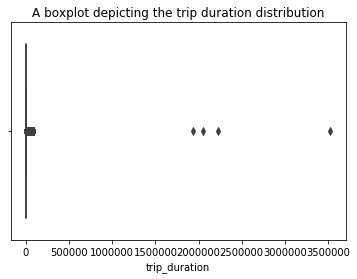

In [48]:
sns.boxplot(df1['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the trip duration distribution')

In [49]:
print( df1['trip_duration'].nlargest(10))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64


Text(0.5, 1.0, 'A boxplot depicting the trip duration distribution after dropping')

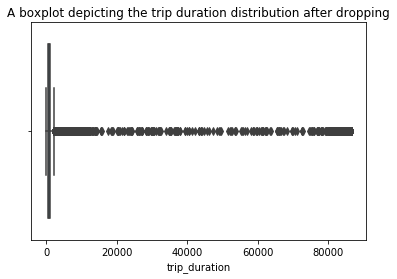

In [10]:
df1_1 = df1.drop([978383,924150,680594,355003])
sns.boxplot(df1_1['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the trip duration distribution after dropping')

Text(0.5, 1.0, 'A boxplot depicting the trip duration distribution after dropping')

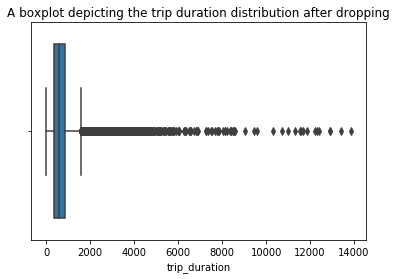

In [282]:
sns.boxplot(df1_2['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the trip duration distribution after dropping')

In [296]:
print( df1_2['trip_duration'].nlargest(10))

533743     13850
1054356    13392
1002882    12926
757062     12909
889760     12419
388861     12313
408658     12218
69364      11868
666855     11665
1122940    11591
Name: trip_duration, dtype: int64


In [309]:
df1_1['id'].loc[df1_1['trip_duration'] > 2000].count()

84420

In [11]:
bins2=np.array([0,1800,3600,5400,7200,90000])
df1_1['duration_time']=pd.cut(df1_1.trip_duration,bins2,labels=["< 5", "5-10", "10-15","15-20",">20"])
df1_1.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  trip_duration_log  \
0         40.765602                  N            455           2.658011   
1         40.731152                  N            663           2.821514   
2         40.710087                  N           2124           3.327155   
3         40.706718                  N            429           2.632457   
4         40.782520                  N            435           2.638489   

  duration_time  
0           < 5  
1           < 5  
2          5-10  
3           < 5  
4           < 5

In [ ]:
pickup = df5000[['pickup_latitude', 'pickup_longitude']]

pickup = pickup.groupby(['pickup_latitude','pickup_longitude']).sum().reset_index().values.tolist()
pickup

In [59]:
import folium
from folium.plugins import HeatMap
def NYC_map(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=False,
                          zoom_start=default_zoom_start)
    return base_map
map2 = NYC_map()

In [60]:
HeatMap(data = pickup,
        radius=8, 
        max_zoom=13).add_to(map2)

In [61]:
map2

In [ ]:
dropoff = df1_2[['dropoff_latitude', 'dropoff_longitude']]

dropoff = dropoff.groupby(['dropoff_latitude','dropoff_longitude']).sum().reset_index().values.tolist()
dropoff

In [57]:
map1 = NYC_map()
HeatMap(data = dropoff,
        radius=8, 
        max_zoom=13).add_to(map1)
map1

In [38]:
limit = 5000
df5000 = df1_2.iloc[0:limit, :]
df5000.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
5  id0801584          2 2016-01-30 22:01:40 2016-01-30 22:09:03   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
5                6        -73.982857        40.742195         -73.992081   

   dropoff_latitude store_and_fwd_flag  ...  pickup_day  pickup_year  \
0         40.765602                  N  ...      Monday         2016   
1         40.731152                  N  ...      Sunday         2016   
3         40.706718                  N  ...   Wednesday         2016   
4         40.782520                  N  ...    Saturday         2016   
5         40.749184                  N  ...    Saturday         2016   

  pickup_month  dropoff_hour  dropoff_day pickup_zone  dropoff_zone  distance  \
0            3            17       Monday   peak-hour     peak-hour  1.961212   
1            6             0       Sunday   mid-night     mid-night  2.264235   
3            4            19    Wednesday   peak-hour     peak-hour  1.494397   
4            3            13     Saturday     mid-day       mid-day  1.188999   
5            1            22     Saturday   mid-night     mid-night  1.283506   

   total_distance speed km/h  
0          2009.1  15.896176  
1          2513.2  13.646335  
3          1779.4  14.932028  
4          1614.9  13.364690  
5          1393.5  11.324153  

[5 rows x 25 columns]

In [394]:
import folium
from folium import plugins
latitude = 40.7128
longitude = -74.0060
#  the map of nyc
nyc_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the trips in the dataframe
trips = plugins.MarkerCluster().add_to(nyc_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df5000.dropoff_latitude, df5000.dropoff_longitude, df5000.id):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(trips)

# display map
nyc_map

Text(0.5, 1.0, 'The distribution of trip duration')

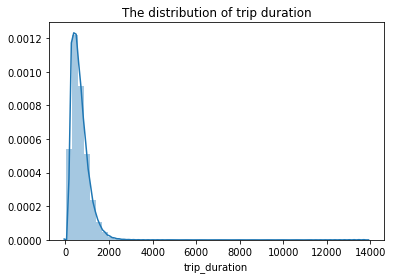

In [295]:
sns.distplot(df1_2['trip_duration'])
plt.title('The distribution of trip duration')

Text(0.5, 1.0, 'The distribution of trip duration')

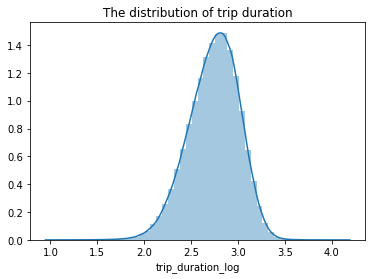

In [395]:
sns.distplot(df1_2['trip_duration_log'])
plt.title('The distribution of trip duration')

##### 3.1.2. Pickup latitude and Pickup longitude
- Use data visualization and write your findings 

Text(0.5, 1.0, 'The distribution of Pick up Longitude')

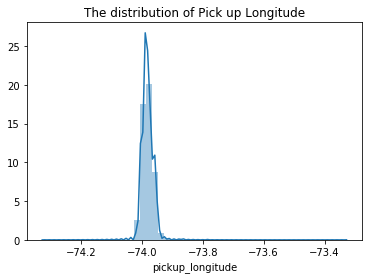

In [294]:
sns.distplot(df1_2['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

Text(0.5, 1.0, 'The distribution of Pick up Latitude')

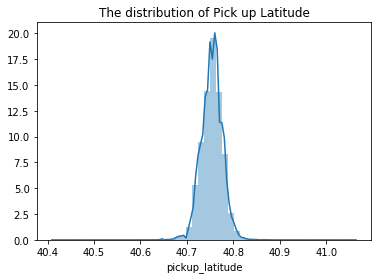

In [289]:
sns.distplot(df1_2['pickup_latitude'])
plt.title('The distribution of Pick up Latitude')

##### 3.1.3. Dropoff latitude and Dripoff longitude
- Use data visualization and write your findings 

Text(0.5, 1.0, 'The distribution of Dropoff up Longitude')

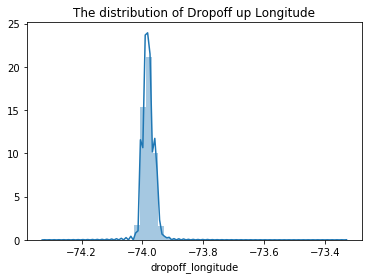

In [287]:
sns.distplot(df1_2['dropoff_longitude'])
plt.title('The distribution of Dropoff up Longitude')

Text(0.5, 1.0, 'The distribution of Dropoff up Latitude')

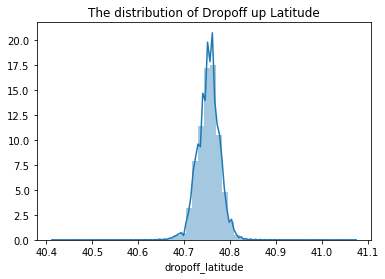

In [288]:
sns.distplot(df1_2['dropoff_latitude'])
plt.title('The distribution of Dropoff up Latitude')

##### 3.1.4. Pickup datatime and Dropoff datetime
-  its better to visualize the trips by hour, day, week, month...

In [23]:
df1_1['pickup_hour']= df1_1.pickup_datetime.dt.hour
df1_1['pickup_date']= df1_1.pickup_datetime.dt.day
df1_1['pickup_day'] = df1.pickup_datetime.dt.day_name()
df1_1['pickup_year']= df1_1.pickup_datetime.dt.year
df1_1['pickup_month'] = df1_1.pickup_datetime.dt.month
df1_1['dropoff_hour']= df1_1.dropoff_datetime.dt.hour
df1_1['dropoff_day'] = df1_1.dropoff_datetime.dt.day_name()
df1_1

id  vendor_id     pickup_datetime    dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
...            ...        ...                 ...                 ...   
1458639  id2376096          2 2016-04-08 13:31:04 2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15 2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41 2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26 2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25 2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
0               -73.964630         40.765602                  N  ...   
1               -73.999481         40.731152                  N  ...   
2               -74.005333         40.710087                  N  ...   
3               -74.012268         40.706718                  N  ...   
4               -73.972923         40.782520                  N  ...   
...                    ...               ...                ...  ...   
1458639         -73.994911         40.740170                  N  ...   
1458640         -73.970184         40.796547                  N  ...   
1458641         -74.004433         40.707371                  N  ...   
1458642         -73.974632         40.757107                  N  ...   
1458643         -73.972809         40.790585                  N  ...   

         pickup_hour  pickup_date pickup_day  pickup_year  pickup_month  \
0                 17           14     Monday         2016             3   
1                  0           12     Sunday         2016             6   
2                 11           19    Tuesday         2016             1   
3                 19            6  Wednesday         2016             4   
4                 13           26   Saturday         2016             3   
...              ...          ...        ...          ...           ...   
1458639           13            8     Friday         2016             4   
1458640            7           10     Sunday         2016             1   
1458641            6           22     Friday         2016             4   
1458642           15            5    Tuesday         2016             1   
1458643           14            5    Tuesday         2016             4   

        dropoff_hour  dropoff_day  pickup_zone  dropoff_zone  distance  
0                 17       Monday    peak-hour     peak-hour  1.961212  
1                  0       Sunday    mid-night     mid-night  2.264235  
2                 12      Tuesday      mid-day       mid-day  6.659077  
3                 19    Wednesday    peak-hour     peak-hour  1.494397  
4                 13     Saturday      mid-day       mid-day  1.188999  
...              ...          ...          ...           ...       ...  
1458639           13       Friday      mid-day       mid-day  1.527779  
1458640            7       Sunda

In [17]:
def timezone(x):
    if x >4 and x <10:
        return 'morning'
    elif x>10 and x<16:
        return 'mid-day'
    elif x>16 and x<22:
        return 'peak-hour'
    else:
        return 'mid-night'
df1_1['pickup_zone']= df1_1['pickup_hour'].apply(timezone)
df1_1['dropoff_zone'] =df1_1['dropoff_hour'].apply(timezone)
df1_1

id  vendor_id     pickup_datetime    dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
...            ...        ...                 ...                 ...   
1458639  id2376096          2 2016-04-08 13:31:04 2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15 2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41 2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26 2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25 2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
0               -73.964630         40.765602                  N  ...   
1               -73.999481         40.731152                  N  ...   
2               -74.005333         40.710087                  N  ...   
3               -74.012268         40.706718                  N  ...   
4               -73.972923         40.782520                  N  ...   
...                    ...               ...                ...  ...   
1458639         -73.994911         40.740170                  N  ...   
1458640         -73.970184         40.796547                  N  ...   
1458641         -74.004433         40.707371                  N  ...   
1458642         -73.974632         40.757107                  N  ...   
1458643         -73.972809         40.790585                  N  ...   

         duration_time  pickup_hour pickup_date  pickup_day  pickup_year  \
0                  < 5           17          14      Monday         2016   
1                  < 5            0          12      Sunday         2016   
2                 5-10           11          19     Tuesday         2016   
3                  < 5           19           6   Wednesday         2016   
4                  < 5           13          26    Saturday         2016   
...                ...          ...         ...         ...          ...   
1458639            < 5           13           8      Friday         2016   
1458640            < 5            7          10      Sunday         2016   
1458641            < 5            6          22      Friday         2016   
1458642            < 5           15           5     Tuesday         2016   
1458643            < 5           14           5     Tuesday         2016   

        pickup_month  dropoff_hour  dropoff_day  pickup_zone dropoff_zone  
0                  3            17       Monday    peak-hour    peak-hour  
1                  6             0       Sunday    mid-night    mid-night  
2                  1            12      Tuesday      mid-day      mid-day  
3                  4            19    Wednesday    peak-hour    peak-hour  
4                  3            13     Saturday      mid-day      mid-day  
...              ...           ...          ...          ...          ...  
1458639            4            13       Friday      mid-day      mid-da

In [297]:
df1_2['pickup_zone'].value_counts()

peak-hour    343606
mid-night    311896
mid-day      293653
morning      182194
Name: pickup_zone, dtype: int64

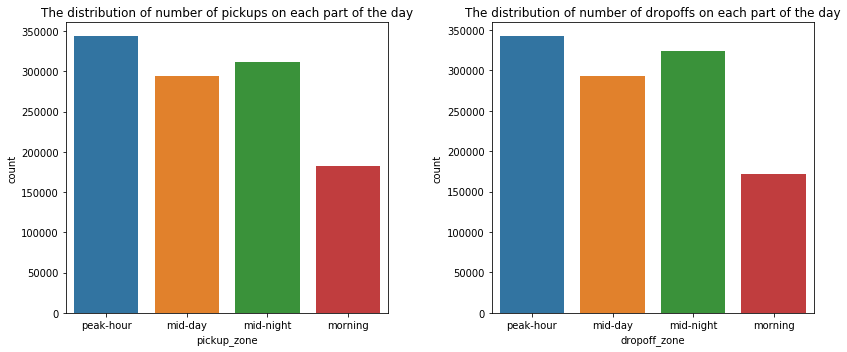

In [299]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(x='pickup_zone',data=df1_2,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_zone',data=df1_2,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

In [300]:
pickup_day_count=df1_2['pickup_day'].value_counts()
pickup_day_count

Friday       173725
Saturday     171357
Thursday     169912
Wednesday    163613
Tuesday      158091
Sunday       149603
Monday       145048
Name: pickup_day, dtype: int64

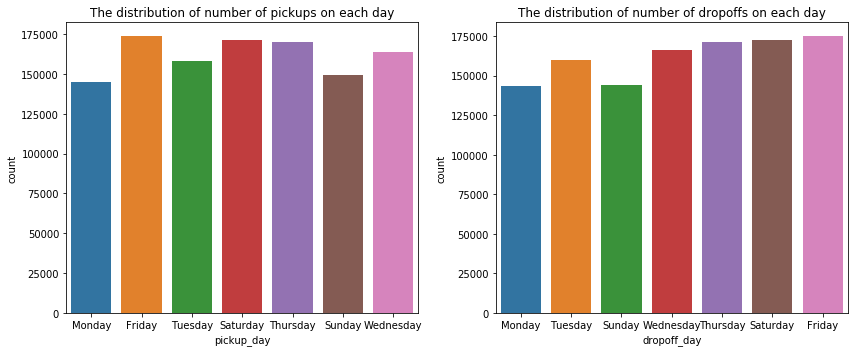

In [301]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(x='pickup_day',data=df1_2,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each day')
sns.countplot(x='dropoff_day',data=df1_2,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each day')
plt.tight_layout()

##### 3.1.5. Vendor 
- use data visualization and write your findings 

(-1.110637759474317, 1.121800964337713, -1.107667324166213, 1.1003651106745815)

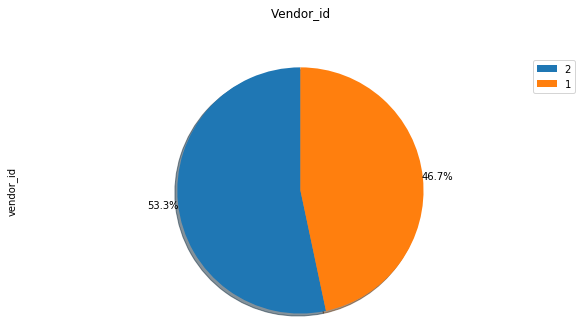

In [302]:
Vendor = df1_2['vendor_id'].value_counts()
Vendor.plot(kind = 'pie',
            figsize=(10, 5),
            autopct='%1.1f%%', 
            startangle=90,    
            shadow=True,       
            labels=None,         
            pctdistance=1.12,    
        )
plt.title('Vendor_id', y=1.12) 
plt.legend(labels=df1_2['vendor_id'], loc='upper right') 
plt.axis('equal') 

##### 3.1.6 Passenger_count

Text(0, 0.5, 'Count')

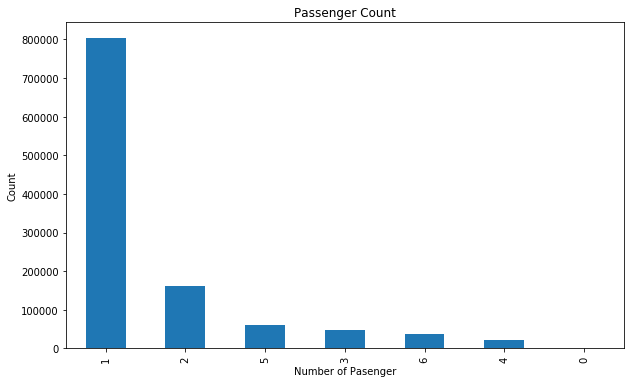

In [303]:
Passenger_count = df1_2['passenger_count'].value_counts()
Passenger_count.plot(kind='bar', figsize = (10,6))

plt.title('Passenger Count')
plt.xlabel('Number of Pasenger')
plt.ylabel('Count')

##### 3.1.7 Add more analysis

In [304]:
SFF=df1_2['store_and_fwd_flag'].value_counts()
SFF

N    1126130
Y       5219
Name: store_and_fwd_flag, dtype: int64

(-1.1010971802497769,
 1.1027812427655166,
 -1.101878681450835,
 1.1000894610214684)

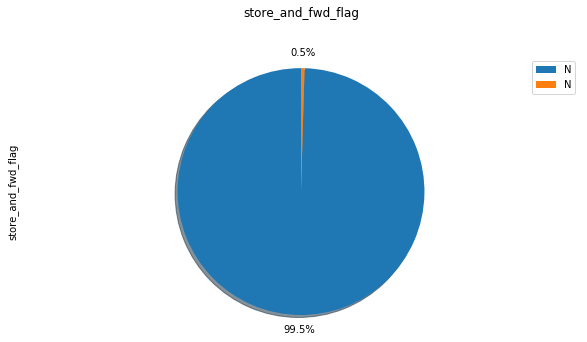

In [305]:
SFF.plot(kind = 'pie',
            figsize=(10, 5),
            autopct='%1.1f%%', 
            startangle=90,    
            shadow=True,       
            labels=None,         
            pctdistance=1.12,    
        )
plt.title('store_and_fwd_flag', y=1.12) 
plt.legend(labels=df1_2['store_and_fwd_flag'], loc='upper right') 
plt.axis('equal') 

#### 3.2. Bivariate Analysis and Multivariate Analysis
- Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.
<br><br/>
- Multivariate Data Analysis is a statistical technique used to analyze data that originates from more than one variable.
<br><br/>
- Now look at the relationship between each of the variables with the target variable **trip_duration**. We’ll start with a few very simple questions.

##### 3.2.1 How pickup location, drop-off location, the direct distance of pickup location and drop-off location impact on trip duration?

In [18]:
from numpy import array
R = 6373.0
lat1 = df1_1['pickup_latitude'].values
long1 = df1_1['pickup_longitude'].values
lat2 = df1_1['dropoff_latitude'].values
long2 = df1_1['dropoff_longitude'].values
dlon = np.radians(long2) - np.radians(long1)
dlat = np.radians(lat2) - np.radians(lat1)
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
print(distance)
df1_1['distance'] = distance
df1_1.tail()


[1.96121235 2.26423516 6.65907748 ... 8.47271168 1.21717619 1.23460146]


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


id  vendor_id     pickup_datetime    dropoff_datetime  \
1458639  id2376096          2 2016-04-08 13:31:04 2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15 2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41 2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26 2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25 2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
1458639         -73.994911         40.740170                  N  ...   
1458640         -73.970184         40.796547                  N  ...   
1458641         -74.004433         40.707371                  N  ...   
1458642         -73.974632         40.757107                  N  ...   
1458643         -73.972809         40.790585                  N  ...   

         pickup_hour  pickup_date pickup_day  pickup_year  pickup_month  \
1458639           13            8     Friday         2016             4   
1458640            7           10     Sunday         2016             1   
1458641            6           22     Friday         2016             4   
1458642           15            5    Tuesday         2016             1   
1458643           14            5    Tuesday         2016             4   

        dropoff_hour  dropoff_day  pickup_zone  dropoff_zone  distance  
1458639           13       Friday      mid-day       mid-day  1.527779  
1458640            7       Sunday      morning       morning  6.446249  
1458641            7       Friday      morning       morning  8.472712  
1458642           16      Tuesday      mid-day     mid-night  1.217176  
1458643           14      Tuesday      mid-day       mid-day  1.234601  

[5 rows x 23 columns]

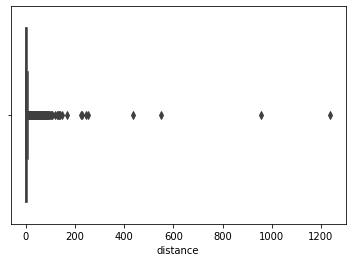

In [79]:
sns.boxplot(df1_1['distance'], orient='horizontal')

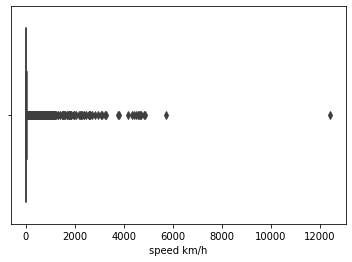

In [111]:
sns.boxplot(df1_1['speed km/h'], orient='horizontal')

In [225]:
print( df1_1['speed km/h'].nlargest(10))

1176332    12428.382857
1366113     5703.600000
1107        4848.300000
470770      4828.680000
533798      4694.760000
656275      4646.736000
1251571     4633.440000
1157620     4584.240000
838405      4502.640000
842         4393.560000
Name: speed km/h, dtype: float64


In [35]:
df1_2

id  vendor_id     pickup_datetime    dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
3        id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
5        id0801584          2 2016-01-30 22:01:40 2016-01-30 22:09:03   
...            ...        ...                 ...                 ...   
1458632  id1920898          1 2016-04-17 18:48:16 2016-04-17 19:00:56   
1458633  id1454193          2 2016-02-02 00:39:39 2016-02-02 00:46:33   
1458634  id2376096          2 2016-04-08 13:31:04 2016-04-08 13:44:02   
1458637  id2714485          1 2016-01-05 15:56:26 2016-01-05 16:02:39   
1458638  id1209952          1 2016-04-05 14:44:25 2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
5                      6        -73.982857        40.742195   
...                  ...               ...              ...   
1458632                1        -73.975357        40.751705   
1458633                5        -73.988823        40.736553   
1458634                4        -73.982201        40.745522   
1458637                1        -73.982079        40.749062   
1458638                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
0               -73.964630         40.765602                  N  ...   
1               -73.999481         40.731152                  N  ...   
3               -74.012268         40.706718                  N  ...   
4               -73.972923         40.782520                  N  ...   
5               -73.992081         40.749184                  N  ...   
...                    ...               ...                ...  ...   
1458632         -73.949478         40.776764                  N  ...   
1458633         -73.989166         40.757393                  N  ...   
1458634         -73.994911         40.740170                  N  ...   
1458637         -73.974632         40.757107                  N  ...   
1458638         -73.972809         40.790585                  N  ...   

         pickup_day  pickup_year pickup_month  dropoff_hour  dropoff_day  \
0            Monday         2016            3            17       Monday   
1            Sunday         2016            6             0       Sunday   
3         Wednesday         2016            4            19    Wednesday   
4          Saturday         2016            3            13     Saturday   
5          Saturday         2016            1            22     Saturday   
...             ...          ...          ...           ...          ...   
1458632      Sunday         2016            4            19       Sunday   
1458633     Tuesday         2016            2             0      Tuesday   
1458634      Friday         2016            4            13       Friday   
1458637     Tuesday         2016            1            16      Tuesday   
1458638     Tuesday         2016            4            14      Tuesday   

        pickup_zone  dropoff_zone  distance  total_distance speed km/h  
0         peak-hour     peak-hour  1.961212          2009.1  15.896176  
1         mid-night     mid-night  2.264235          2513.2  13.646335  
3         peak-hour     peak-hour  1.494397          1779.4  14.932028  
4           mid-day       mid-day  1.188999          1614.9  13.364690  
5         mid-night     mid-night  1.283506          1393.5  11.324153  
...             ...           ...       ...             ...        ...  
1458632   peak-hour     peak-hour  4.000634          4271.2  20.232000  
1458633   mid-night 

In [34]:

df1_2 = df1_1[df1_1.distance >0.1]
df1_2 = df1_2[df1_1.distance <5.5]
# df1_2 = pd.merge(df1_2,
#                  df34[['id','total_distance']],
#                  on='id')
# df1_2['speed km/h'] = (df1_2['total_distance']/1000)/(df1_2['trip_duration']/3600)
# df1_1 = pd.merge(df1_1,
#                  df34[['id','total_distance']],
#                  on='id')
# df1_1['speed km/h'] = (df1_1['total_distance']/1000)/(df1_1['trip_duration']/3600)
df1_2 = df1_2[df1_2['speed km/h']<32]
df1_2 = df1_2[df1_2['speed km/h']>1]
df1_2

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


id  vendor_id     pickup_datetime    dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
3        id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
5        id0801584          2 2016-01-30 22:01:40 2016-01-30 22:09:03   
...            ...        ...                 ...                 ...   
1458632  id1920898          1 2016-04-17 18:48:16 2016-04-17 19:00:56   
1458633  id1454193          2 2016-02-02 00:39:39 2016-02-02 00:46:33   
1458634  id2376096          2 2016-04-08 13:31:04 2016-04-08 13:44:02   
1458637  id2714485          1 2016-01-05 15:56:26 2016-01-05 16:02:39   
1458638  id1209952          1 2016-04-05 14:44:25 2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
5                      6        -73.982857        40.742195   
...                  ...               ...              ...   
1458632                1        -73.975357        40.751705   
1458633                5        -73.988823        40.736553   
1458634                4        -73.982201        40.745522   
1458637                1        -73.982079        40.749062   
1458638                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
0               -73.964630         40.765602                  N  ...   
1               -73.999481         40.731152                  N  ...   
3               -74.012268         40.706718                  N  ...   
4               -73.972923         40.782520                  N  ...   
5               -73.992081         40.749184                  N  ...   
...                    ...               ...                ...  ...   
1458632         -73.949478         40.776764                  N  ...   
1458633         -73.989166         40.757393                  N  ...   
1458634         -73.994911         40.740170                  N  ...   
1458637         -73.974632         40.757107                  N  ...   
1458638         -73.972809         40.790585                  N  ...   

         pickup_day  pickup_year pickup_month  dropoff_hour  dropoff_day  \
0            Monday         2016            3            17       Monday   
1            Sunday         2016            6             0       Sunday   
3         Wednesday         2016            4            19    Wednesday   
4          Saturday         2016            3            13     Saturday   
5          Saturday         2016            1            22     Saturday   
...             ...          ...          ...           ...          ...   
1458632      Sunday         2016            4            19       Sunday   
1458633     Tuesday         2016            2             0      Tuesday   
1458634      Friday         2016            4            13       Friday   
1458637     Tuesday         2016            1            16      Tuesday   
1458638     Tuesday         2016            4            14      Tuesday   

        pickup_zone  dropoff_zone  distance  total_distance speed km/h  
0         peak-hour     peak-hour  1.961212          2009.1  15.896176  
1         mid-night     mid-night  2.264235          2513.2  13.646335  
3         peak-hour     peak-hour  1.494397          1779.4  14.932028  
4           mid-day       mid-day  1.188999          1614.9  13.364690  
5         mid-night     mid-night  1.283506          1393.5  11.324153  
...             ...           ...       ...             ...        ...  
1458632   peak-hour     peak-hour  4.000634          4271.2  20.232000  
1458633   mid-night 

In [36]:
df1_2.loc[df1_2['distance']>55]

Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration, trip_duration_log, duration_time, pickup_hour, pickup_date, pickup_day, pickup_year, pickup_month, dropoff_hour, dropoff_day, pickup_zone, dropoff_zone, distance, total_distance, speed km/h]
Index: []

[0 rows x 25 columns]

In [37]:
print( df1_2['speed km/h'].nlargest(10))

686457     31.999945
473089     31.999911
1101203    31.999901
401778     31.999821
1350374    31.999777
1262720    31.999744
866023     31.999592
708621     31.999429
820134     31.999304
1245226    31.999204
Name: speed km/h, dtype: float64


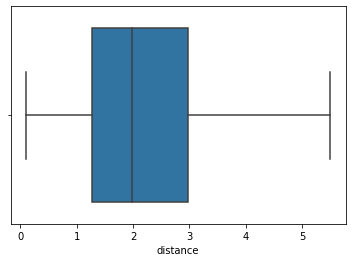

In [234]:
sns.boxplot(df1_2['distance'], orient='horizontal')

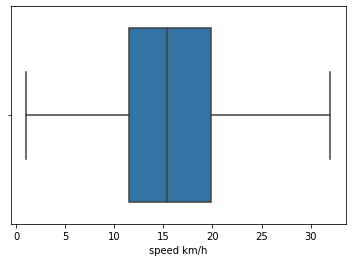

In [231]:
sns.boxplot(df1_2['speed km/h'], orient='horizontal')

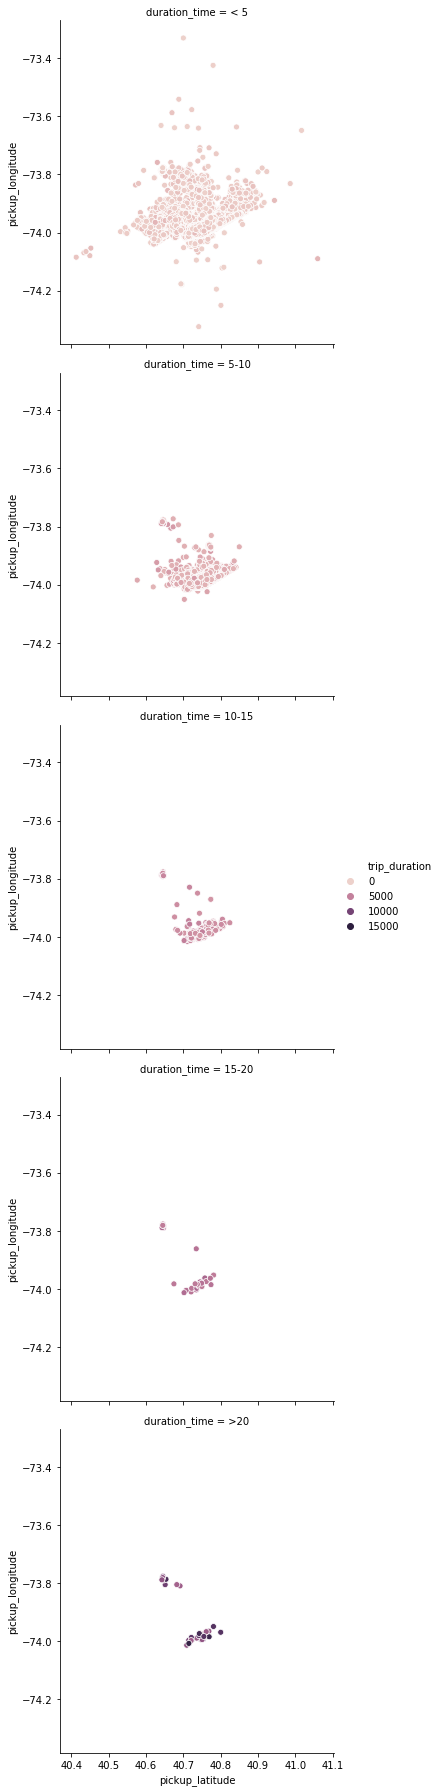

In [277]:
sns.relplot(x='pickup_latitude', y='pickup_longitude',hue='trip_duration',row = 'duration_time',data = df1_2)

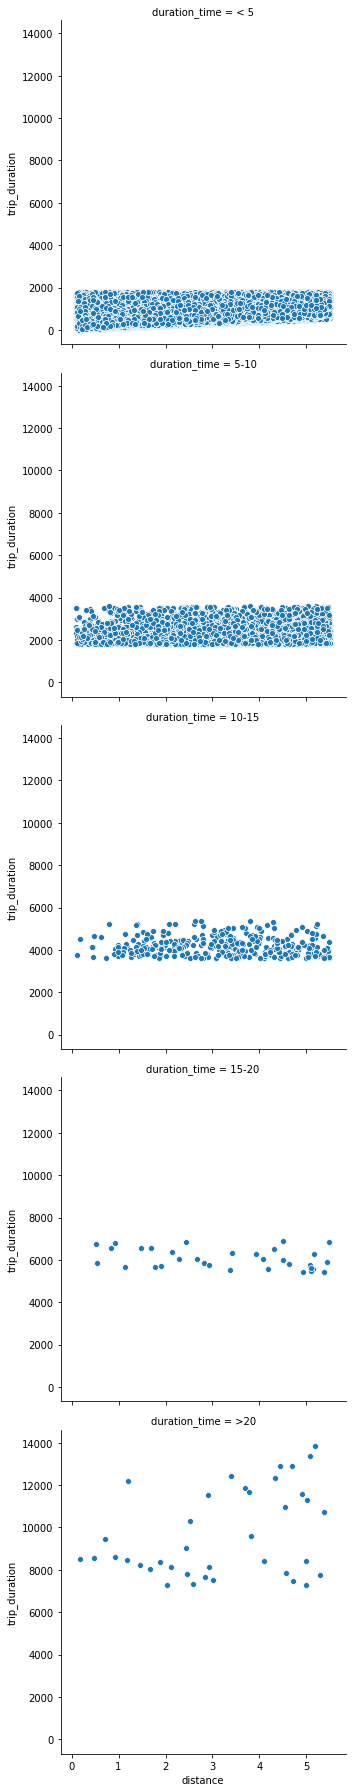

In [278]:
sns.relplot(x='distance',y='trip_duration', row = 'duration_time',data=df1_2)

In [313]:
df1_2[['total_distance','trip_duration']].corr()

total_distance  trip_duration
total_distance        1.000000       0.673483
trip_duration         0.673483       1.000000

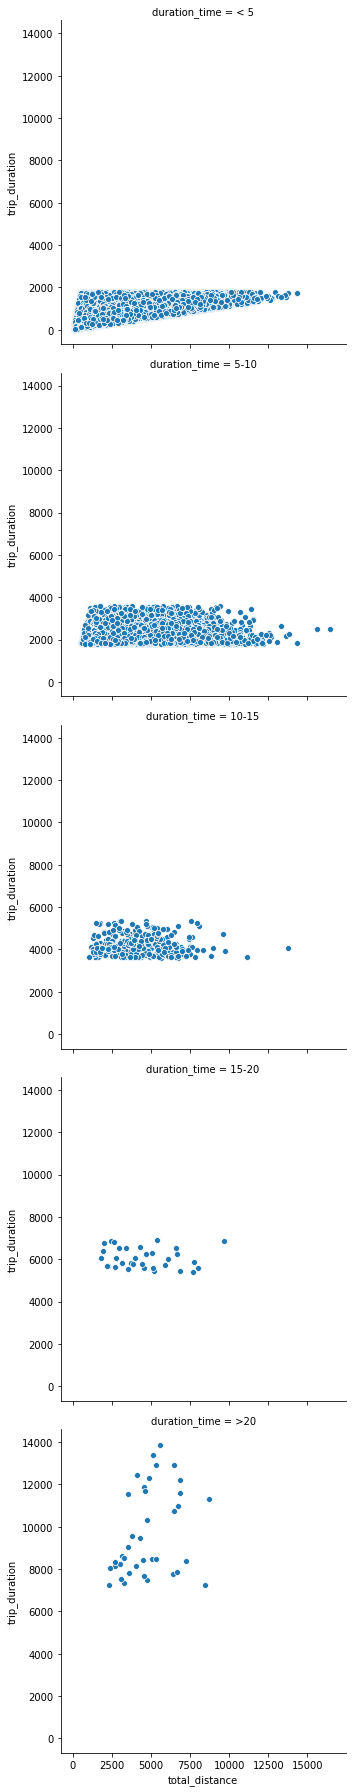

In [311]:
sns.relplot(x='total_distance',y='trip_duration', row = 'duration_time',data=df1_2)

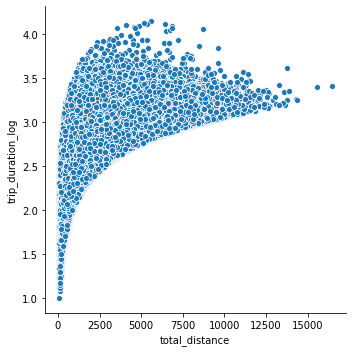

In [396]:
sns.relplot(x='total_distance',y='trip_duration_log',data=df1_2)

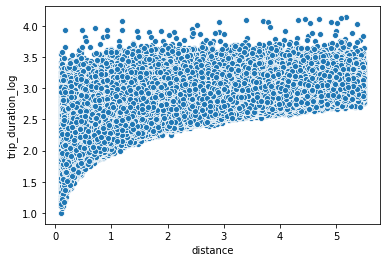

In [397]:
sns.scatterplot(x='distance',y='trip_duration_log',data=df1_2)

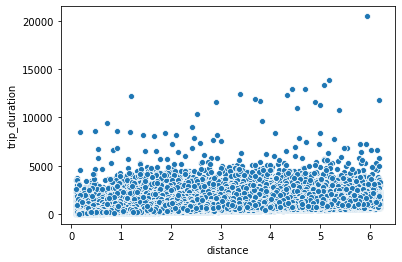

In [123]:
sns.scatterplot(x='distance',y='trip_duration',data=df1_2)

##### 3.2.2 How pickup datetime affects to trip duration? Do quieter days and hours lead to faster trips?

In [318]:
df1_2[['pickup_hour','trip_duration']].corr()

pickup_hour  trip_duration
pickup_hour       1.000000       0.039911
trip_duration     0.039911       1.000000

In [314]:
hour_trip = df1_2[['pickup_zone','trip_duration']].groupby(['pickup_zone']).mean()
hour_trip 

trip_duration
pickup_zone               
mid-day         719.723936
mid-night       620.774713
morning         622.706187
peak-hour       655.298228

Text(0, 0.5, 'trip_duration')

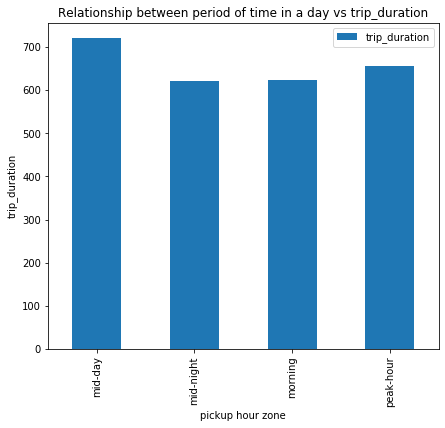

In [315]:
hour_trip.plot(kind ='bar', figsize = (7,6))
plt.title("Relationship between period of time in a day vs trip_duration")
plt.xlabel("pickup hour zone")
plt.ylabel("trip_duration")

In [151]:
day_trip = df1_2[['pickup_day','duration_time']].groupby(['pickup_day','duration_time']).size()
day_trip 

pickup_day  duration_time
Friday      < 5              178341
            5-10               3331
            10-15                66
            15-20                 5
            >20                   3
Monday      < 5              149493
            5-10               2465
            10-15                38
            15-20                 6
            >20                   7
Saturday    < 5              176824
            5-10               2894
            10-15                58
            15-20                 4
            >20                   6
Sunday      < 5              154776
            5-10               2333
            10-15                62
            15-20                 4
            >20                   5
Thursday    < 5              174219
            5-10               3476
            10-15                54
            15-20                 7
            >20                   3
Tuesday     < 5              162182
            5-10               3140
  

Text(0, 0.5, 'trip_duration')

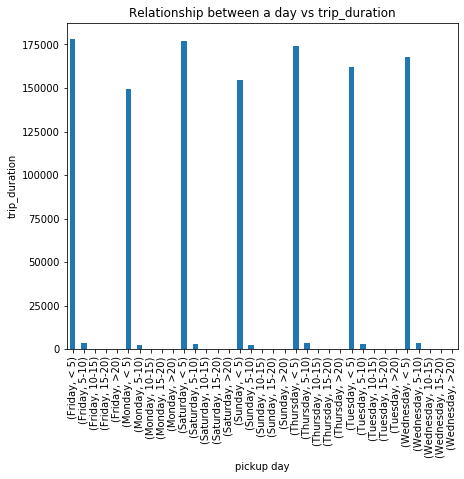

In [152]:
day_trip.plot(kind ='bar', figsize = (7,6))
plt.title("Relationship between a day vs trip_duration")
plt.xlabel("pickup day")
plt.ylabel("trip_duration")

##### 3.2.3	How different numbers of passengers and the different vendors are correlated with the duration of the trip?

In [159]:
#df1_2.drop(['year_month_date'], axis =1)
df1_1.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_log', 'duration_time', 'pickup_hour',
       'pickup_day', 'pickup_month', 'dropoff_hour', 'dropoff_day',
       'pickup_zone', 'dropoff_zone', 'distance', 'total_distance',
       'speed km/h', 'pickup_date', 'pickup_year'],
      dtype='object')

In [179]:
pass_trip = df1_2[['passenger_count','trip_duration_log']].groupby(['passenger_count']).mean()
pass_trip

trip_duration_log
passenger_count                   
0                         2.514903
1                         2.743656
2                         2.758789
3                         2.762866
4                         2.767046
5                         2.747539
6                         2.746647

Text(0, 0.5, 'trip_duration')

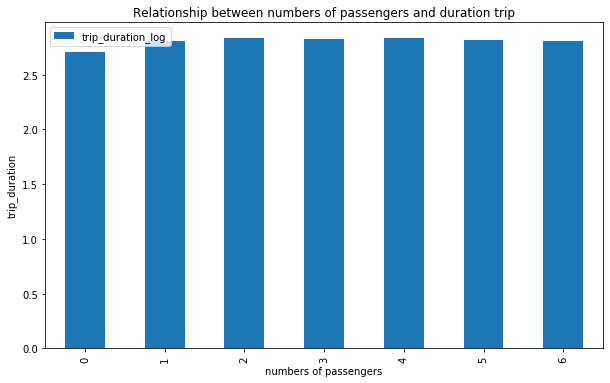

In [94]:
pass_trip.plot(kind = 'bar', figsize=(10,6))
plt.title("Relationship between numbers of passengers and duration trip")
plt.xlabel("numbers of passengers")
plt.ylabel("trip_duration")

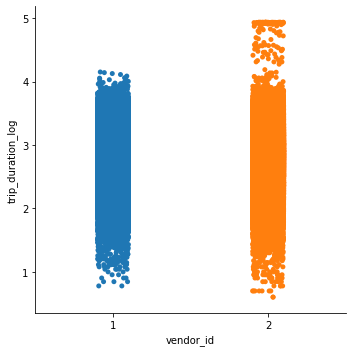

In [95]:
sns.catplot(x="vendor_id", y="trip_duration_log",kind="strip",data=df1_2)

##### 3.2.4 Add more your questions:

In [249]:
df1_2['date'] = df1_1['pickup_year'].astype(str) + '-' +df1_1['pickup_month'].astype(str) + '-' +df1_1['pickup_date'].astype(str)
df1_2['date'] = df1_2['date'].astype('datetime64[ns]')
df1_2 = pd.merge(df1_2,
                 df2[['date','maximum temperature', 'minimum temperature', 'average temperature','precipitation','snow fall','snow depth']],
                 on = 'date')

#### 3.3 More Analysis with External data
- We have two other tables: weather and faster routes. Use your analysis to find more features that are correlated with trip duration.

##### 3.3.1 How weather affect to total time of a trip? How does snow or rain impact on trip duration?

In [376]:
df1_2.replace("T", np.nan, inplace = True)
avg_tem = df1_2["average temperature"].astype("float").mean(axis=0)
df1_2["average temperature"].replace(np.nan, avg_tem, inplace=True)
avg_pre = df1_2['precipitation'].astype('float').mean(axis=0)
df1_2['precipitation'].replace(np.nan, avg_pre,inplace =True)
df1_2['precipitation'].astype('float')
avg_snow = df1_2['snow fall'].astype('float').mean(axis=0)
df1_2['snow fall'].replace(np.nan,avg_snow,inplace = True)


In [364]:
df1_2[['average temperature','trip_duration']].corr()

average temperature  trip_duration
average temperature             1.000000       0.020834
trip_duration                   0.020834       1.000000

In [187]:
tem_trip = df1_2[['average temperature','trip_duration_log']].groupby(['average temperature']).mean()
tem_trip = tem_trip.reset_index()
tem_trip

average temperature  trip_duration_log
0                   7.0           2.744942
1                  14.0           2.746620
2                  20.0           2.747474
3                  22.0           2.749162
4                  24.0           2.749437
..                  ...                ...
89                 78.5           2.746651
90                 79.5           2.748307
91                 80.0           2.745495
92                 81.5           2.751225
93                 83.0           2.744127

[94 rows x 2 columns]

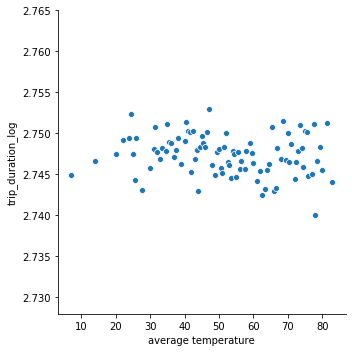

In [188]:
sns.relplot(x='average temperature', y='trip_duration_log', data = tem_trip)

In [333]:
pre_trip1 = df1_2[['precipitation','trip_duration']].groupby(['precipitation']).mean()
pre_trip1 = pre_trip1.reset_index()
pre_trip1 = pre_trip1.drop([39,40])
pre_trip1.head()

precipitation  trip_duration
0             0     647.663995
1          0.00     665.725763
2          0.01     658.378547
3          0.02     636.783848
4          0.03     563.640561

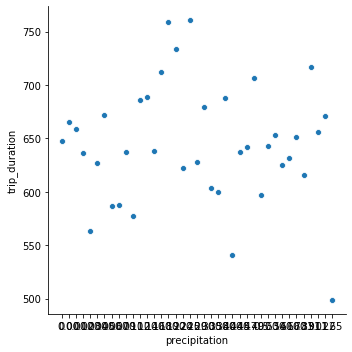

In [255]:
sns.relplot(x='precipitation', y='trip_duration', data = pre_trip1)

In [407]:
df1_2['snow fall'] = df1_2['snow fall'].astype('float64')
snow_trip1 = df1_2[['snow fall','trip_duration']].groupby(['snow fall']).mean()
#snow_trip1 = snow_trip1.drop(['27.3', 'T'])
snow_trip1

trip_duration
snow fall               
0.000000      660.945294
0.060186      620.217376
0.200000      635.124344
0.400000      569.442467
0.500000      586.535498
1.400000      541.265697
2.500000      642.495375
27.300000     623.685535

Text(0, 0.5, 'trip_duration')

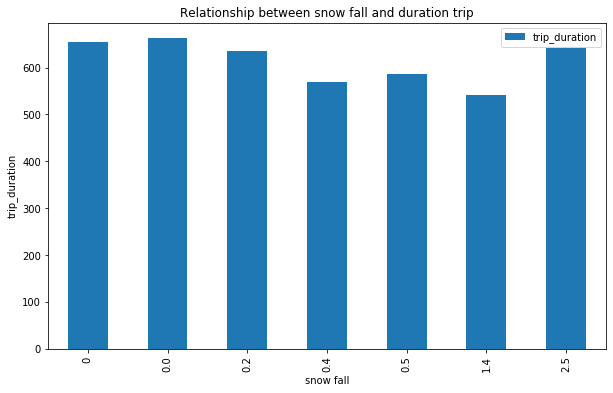

In [257]:
snow_trip1.plot(kind ='bar', figsize=(10,6))
plt.title("Relationship between snow fall and duration trip")
plt.xlabel("snow fall")
plt.ylabel("trip_duration")

- Another external data set is fastest route of each trip that includes the pickup/dropoff streets and total distance/duration between these two points together with a sequence of travels steps such as turns or entering a highway. 
- This is suggested information about the fastest route from starting street to ending street for a trip that will help you estimate the duration.

##### 3.3.2 How is number of left turns, right turns, turns effect to trip duration? 

In [402]:
df1_2 = pd.merge(df1_2,
                 df34[['id','number_of_steps']],
                 on='id')
turn_trip= df1_2[['id','number_of_steps','trip_duration_log']].groupby(['number_of_steps']).mean()
turn_trip=turn_trip.reset_index()
turn_trip['average per step'] = turn_trip['trip_duration_log']/turn_trip['number_of_steps']
turn_trip.head()

number_of_steps  trip_duration_log  average per step
0                2           2.454945          1.227472
1                3           2.545751          0.848584
2                4           2.634336          0.658584
3                5           2.706170          0.541234
4                6           2.762301          0.460383

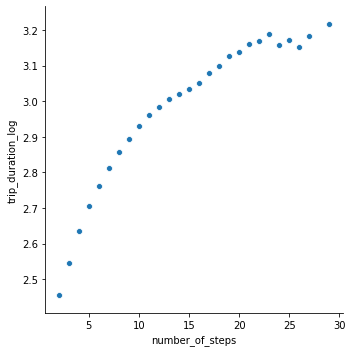

In [403]:
sns.relplot(x='number_of_steps', y='trip_duration_log', data = turn_trip)

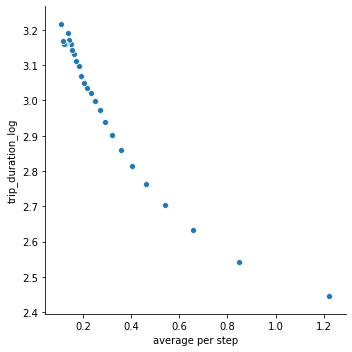

In [125]:
sns.relplot(x='average per step', y='trip_duration_log', data = turn_trip)

In [136]:
turn_trip.corr()

number_of_steps  trip_duration_log  average per step
number_of_steps           1.000000           0.920248         -0.795760
trip_duration_log         0.920248           1.000000         -0.950867
average per step         -0.795760          -0.950867          1.000000

### <span style="color:blue">4.Feature Selection </span>

- Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in
<br><br/>
- Read here
https://www.kaggle.com/sz8416/6-ways-for-feature-selection
<br><br/>
- After engineering new features and before starting the modelling, we will visualize the relations between our parameters using a correlation matrix. For this, we need to change all the input features into a numerical format. The visualisation uses the heatmap plot from seaborn package

#### 4.1 Correlation
- Read more about feature selection with correlation: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

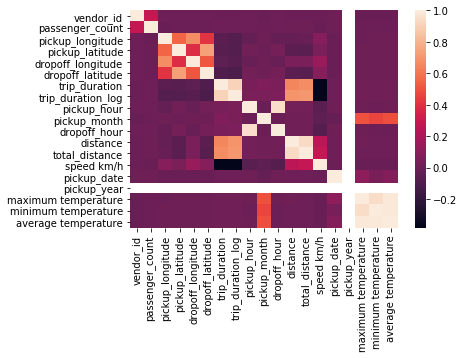

In [258]:
sns.heatmap(df1_2.corr())

In [127]:
dummy_variable_1 = pd.get_dummies(df1_2["store_and_fwd_flag"])
dummy_variable_1.head()

N  Y
0  1  0
1  1  0
2  1  0
3  1  0
4  1  0

In [274]:
#df1_2 = pd.concat([df1_2,dummy_variable_1], axis =1)
df1_2.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_log', 'duration_time', 'pickup_hour',
       'pickup_day', 'pickup_month', 'dropoff_hour', 'dropoff_day',
       'pickup_zone', 'dropoff_zone', 'distance', 'total_distance',
       'speed km/h', 'pickup_date', 'pickup_year', 'date',
       'maximum temperature', 'minimum temperature', 'average temperature',
       'precipitation', 'snow fall', 'snow depth'],
      dtype='object')

#### 4.2 Using feature importance

- Install lightgbm package 
- Use lightgbm for feature selection


In [372]:
df_num=df1_2._get_numeric_data()
df_num

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.975090        40.758766   
2                1                1        -73.994484        40.745087   
3                2                3        -73.944359        40.714489   
4                2                1        -73.952881        40.766468   
...            ...              ...               ...              ...   
1131344          1                1        -73.969589        40.798058   
1131345          1                1        -73.980942        40.744469   
1131346          2                3        -73.948730        40.773811   
1131347          2                1        -73.993912        40.751549   
1131348          1                1        -73.994881        40.755344   

         dropoff_longitude  dropoff_latitude  trip_duration  \
0               -73.964630         40.765602            455   
1               -73.953201         40.765068           1346   
2               -73.998993         40.722710            695   
3               -73.910530         40.709492            755   
4               -73.978630         40.761921           1050   
...                    ...               ...            ...   
1131344         -73.987007         40.774296            483   
1131345         -73.991600         40.749134            331   
1131346         -73.955879         40.763882            270   
1131347         -73.974213         40.794109           1042   
1131348         -73.999962         40.734497            935   

         trip_duration_log  pickup_hour  pickup_month  dropoff_hour  distance  \
0                 2.658011           17             3            17  1.961212   
1                 3.129045           14             3            14  2.526307   
2                 2.841985           15             3            15  2.538449   
3                 2.877947            4             3             4  3.772797   
4                 3.021189           14             3            15  2.900137   
...                    ...          ...           ...           ...       ...   
1131344           2.683947           21             3            21  3.275261   
1131345           2.519828           22             3            22  1.289331   
1131346           2.431364            6             3             6  1.359727   
1131347           3.017868           18             3            18  5.214172   
1131348           2.970812           12             3            12  2.386107   

         total_distance  speed km/h  pickup_date  pickup_year  \
0                2009.1   15.896176           14         2016   
1                2782.9    7.443120           14         2016   
2                3124.4   16.183942           14         2016   
3                3327.8   15.867656           14         2016   
4                3354.8   11.502171           14         2016   
...                 ...         ...          ...          ...   
1131344          3243.6   24.175901           25         2016   
1131345          1037.1   11.279637           25         2016   
1131346          1257.9   16.772000           25         2016   
1131347          6628.8   22.901804           25         2016   
1131348          2874.5   11.067594           25         2016   

         maximum temperature  minimum temperature  average temperature  
0                         51                   40                 45.5  
1                         51                   40                 45.5  
2                         51                   40                 45.5  
3                         51                   40                 45.5  
4                         51                   40                 45.5  
...                      ...                  ...                  ...  
1131344                   72                   44                 58.0  
1131345                  

In [194]:
y_data= df_num['trip_duration']
x_data1=df_num.drop('trip_duration',axis =1)
x_data = x_data1.drop('trip_duration_log',axis =1)
x_data

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                2                6        -73.977753        40.754631   
2                2                1        -73.958397        40.772629   
3                1                1        -73.955261        40.780243   
4                2                6        -73.980927        40.779697   
...            ...              ...               ...              ...   
1184986          2                1        -73.987221        40.737370   
1184987          2                3        -73.963020        40.775074   
1184988          2                2        -74.004059        40.713066   
1184989          1                1        -73.961182        40.770065   
1184990          2                5        -73.988823        40.736553   

         dropoff_longitude  dropoff_latitude  pickup_hour  pickup_month  \
0               -73.964630         40.765602           17             3   
1               -74.001678         40.756420            9             2   
2               -73.955132         40.774242           21             2   
3               -73.969872         40.789764           14             4   
4               -73.975021         40.784332           20             3   
...                    ...               ...          ...           ...   
1184986         -73.999603         40.726849           18             4   
1184987         -73.977928         40.754593           11             6   
1184988         -74.007202         40.705193           21             2   
1184989         -73.976204         40.751972           15             2   
1184990         -73.989166         40.757393            0             2   

         dropoff_hour  distance  total_distance  speed km/h  pickup_date  \
0                  17  1.961212          2009.1   15.896176           14   
1                   9  2.659068          2660.1   15.104669           15   
2                  21  0.404398           453.8   28.661053           20   
3                  14  1.937612          2884.9   11.669258           26   
4                  20  0.834094           868.2   17.962759           30   
...               ...       ...             ...         ...          ...   
1184986            18  1.801138          1944.7   12.964667           19   
1184987            11  2.814839          3468.0   10.837500           21   
1184988            21  0.941866          1544.5   13.430435           19   
1184989            16  2.612317          2461.4   12.992727           14   
1184990             0  2.318307          3190.7   27.745217            2   

         pickup_year  number_of_steps  N  Y  maximum temperature  \
0               2016                5  1  0                   51   
1               2016                3  1  0                   51   
2               2016                3  1  0                   51   
3               2016               10  1  0                   51   
4               2016                3  1  0                   51   
...              ...              ... .. ..                  ...   
1184986         2016                6  1  0                   52   
1184987         2016                8  1  0                   52   
1184988         2016                6  1  0                   52   
1184989         2016                3  1  0                   52   
1184990         2016                5  1  0                   52   

         minimum temperature  average temperature  
0                         40                 45.5  
1                         40                 45.5  
2                         40                 45.5  
3                         40                 45.5  
4                         40                 45.5  
...                      ...                  ...  
1184986                   48                 50.0  
1184987                   48                 50.0  
1184988              

In [195]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 177749
number of training samples: 1007242


In [196]:
x_train.head()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
3315            2                1        -73.994797        40.760010   
373986          2                2        -73.977631        40.762871   
12385           2                1        -73.990326        40.741943   
655608          2                1        -73.959206        40.767933   
919883          1                1        -73.996735        40.737202   

        dropoff_longitude  dropoff_latitude  pickup_hour  pickup_month  \
3315           -74.002449         40.739651           21             2   
373986         -73.964455         40.765549            8             5   
12385          -73.952576         40.720554            1             3   
655608         -73.965225         40.752644           21             1   
919883         -73.981834         40.732269            0             4   

        dropoff_hour  distance  total_distance  speed km/h  pickup_date  \
3315              21  2.417963          3034.5   25.948219            8   
373986             8  1.491322          1731.8   13.264851           13   
12385              1  4.804050          7749.0   22.698454           18   
655608            21  1.826888          2341.9   23.289613           15   
919883             0  1.736966          1478.6   10.975175           10   

        pickup_year  number_of_steps  N  Y  maximum temperature  \
3315           2016                6  1  0                   51   
373986         2016                7  1  0                   61   
12385          2016               18  1  0                   28   
655608         2016                8  1  0                   88   
919883         2016                3  1  0                   39   

        minimum temperature  average temperature  
3315                     40                 45.5  
373986                   39                 50.0  
12385                    16                 22.0  
655608                   66                 77.0  
919883                   28                 33.5

In [197]:
y_train.head()

3315       421
373986     470
12385     1229
655608     362
919883     485
Name: trip_duration, dtype: int64

In [198]:
from sklearn.feature_selection import SelectFromModel

import lightgbm as lgb
lgbc=lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05, num_leaves=32)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(x_train, y_train)

SelectFromModel(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                        colsample_bytree=1.0,
                                        importance_type='split',
                                        learning_rate=0.05, max_depth=-1,
                                        min_child_samples=20,
                                        min_child_weight=0.001,
                                        min_split_gain=0.0, n_estimators=100,
                                        n_jobs=-1, num_leaves=32,
                                        objective=None, random_state=None,
                                        reg_alpha=0.0, reg_lambda=0.0,
                                        silent=True, subsample=1.0,
                                        subsample_for_bin=200000,
                                        subsample_freq=0),
                max_features=None, norm_order=1, prefit=False,
                threshold='1.25*median')

In [199]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = x_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

10 selected features


In [200]:
embeded_lgb_feature

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_hour',
 'dropoff_hour',
 'distance',
 'total_distance',
 'speed km/h',
 'number_of_steps']

In [201]:
df1_2[['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_hour',
 'dropoff_hour',
 'distance',
 'total_distance',
 'speed km/h',
 'number_of_steps','trip_duration']].corr()

pickup_longitude  pickup_latitude  dropoff_longitude  \
pickup_longitude           1.000000         0.533218           0.653461   
pickup_latitude            0.533218         1.000000           0.349904   
dropoff_longitude          0.653461         0.349904           1.000000   
dropoff_latitude           0.371615         0.701440           0.487594   
pickup_hour               -0.022422         0.020711          -0.011497   
dropoff_hour              -0.018810         0.028807          -0.012592   
distance                  -0.015498        -0.064698           0.065016   
total_distance            -0.012685        -0.067531           0.061317   
speed km/h                 0.091382         0.043875           0.156101   
number_of_steps           -0.083502        -0.182118          -0.018382   
trip_duration             -0.056005        -0.070751          -0.039058   

                   dropoff_latitude  pickup_hour  dropoff_hour  distance  \
pickup_longitude           0.371615    -0.022422     -0.018810 -0.015498   
pickup_latitude            0.701440     0.020711      0.028807 -0.064698   
dropoff_longitude          0.487594    -0.011497     -0.012592  0.065016   
dropoff_latitude           1.000000     0.024605      0.031824 -0.065020   
pickup_hour                0.024605     1.000000      0.951143  0.016562   
dropoff_hour               0.031824     0.951143      1.000000  0.012295   
distance                  -0.065020     0.016562      0.012295  1.000000   
total_distance            -0.083355     0.017268      0.012041  0.941844   
speed km/h                 0.080527    -0.071357     -0.084468  0.287920   
number_of_steps           -0.207341     0.011232      0.003916  0.558739   
trip_duration             -0.105417     0.043012      0.050236  0.665075   

                   total_distance  speed km/h  number_of_steps  trip_duration  
pickup_longitude        -0.012685    0.091382        -0.083502      -0.056005  
pickup_latitude         -0.067531    0.043875        -0.182118      -0.070751  
dropoff_longitude        0.061317    0.156101        -0.018382      -0.039058  
dropoff_latitude        -0.083355    0.080527        -0.207341      -0.105417  
pickup_hour              0.017268   -0.071357         0.011232       0.043012  
dropoff_hour             0.012041   -0.084468         0.003916       0.050236  
distance                 0.941844    0.287920         0.558739       0.665075  
total_distance           1.000000    0.317108         0.681099       0.680896  
speed km/h               0.317108    1.000000         0.180874      -0.341462  
number_of_steps          0.681099    0.180874         1.000000       0.469428  
trip_duration            0.680896   -0.341462         0.469428       1.000000

### <span style="color:blue">5.Conclusion </span>
- Write all features that you select to predict trip duration on the report